## Download and Extract Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1iSm_jNCaemIjxBe2DLLyXcH_KAYQniCA
!unzip -q /content/dataset.zip

## Download and Extract Latest Checkpoint

In [ ]:
!gdown https://drive.google.com/uc?id=1jChJ14ftUALOpnrCjcpoRfLTRnKMD62W
!unzip -q /content/outputs_finetune.zip

## Change Dataset Folder Structure to Coco 2017

In [ ]:
!mv /content/dataset/train /content/dataset/train2017
!mv /content/dataset/valid /content/dataset/val2017
!mv /content/dataset/annotations/train_annotations.json /content/dataset/annotations/instances_train2017.json
!mv /content/dataset/annotations/valid_annotations.json /content/dataset/annotations/instances_val2017.json

## Clone DETR Repo

We using DETR fork for this colab (because this fork can change the number of classes)

In [ ]:
!git clone https://github.com/aivclab/detr
!pip install -r /content/detr/requirements.txt
!pip install torch==1.8.0 torchvision==0.9.0

## Model

In [ ]:
n_class = 4 # 3 class (plastic, bio, and rov) + 1 for no class
data_file = 'coco'
data_dir = '/content/dataset'
resume_file = '/content/outputs/checkpoint.pth'
!mkdir /content/new_outputs
out_dir = '/content/new_outputs'

In [ ]:
%cd /content/detr

!python main.py \
  --dataset_file $data_file \
  --coco_path $data_dir \
  --output_dir $out_dir \
  --resume $resume_file \
  --num_classes $n_class \
  --lr 1e-5 \
  --lr_backbone 1e-6 \
  --epochs 30

## Performance Graph

In [ ]:
from util.plot_utils import plot_logs
from pathlib import Path

log_directory = [Path(out_dir)]

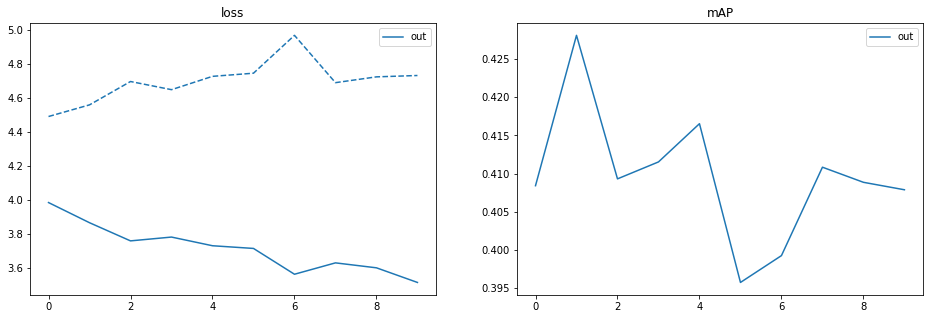

In [ ]:
fields_of_interest = ('loss', 'mAP')
plot_logs(log_directory, fields_of_interest)

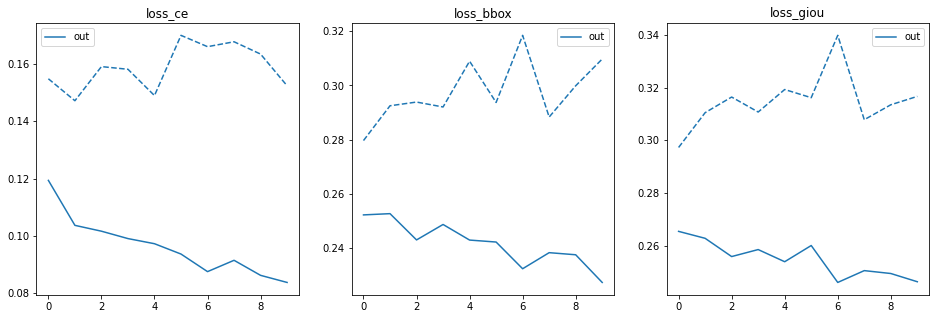

In [ ]:
fields_of_interest = ('loss_ce', 'loss_bbox', 'loss_giou')
plot_logs(log_directory, fields_of_interest)

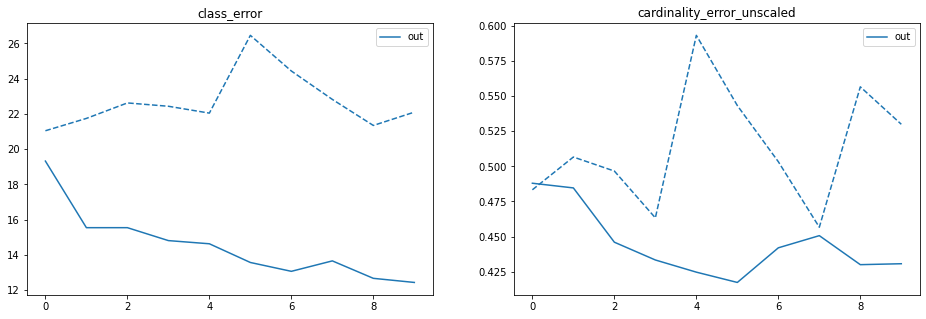

In [ ]:
fields_of_interest = ('class_error', 'cardinality_error_unscaled')
plot_logs(log_directory, fields_of_interest)   